## Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset preparation

Load data

In [3]:
bank_path = './Dataset/bank+marketing/bank.csv'

# Load bank.csv
data = pd.read_csv(bank_path, sep=';', skiprows=1, names=[
    'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
    'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'
])

data_display = data.copy()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
le_dict = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    data[col] = le_dict[col].fit_transform(data[col])
print(data_display.head())
print("Bank Marketing - Data shape:", data.shape)

X_bank = data.drop('y', axis=1)  # Features
y_bank = data['y'].map({'yes': 1, 'no': 0})  # Target: yes=1, no=0

# Scale features
scaler_bank = StandardScaler()
X_bank_scaled = scaler_bank.fit_transform(X_bank)

print("Bank Marketing - Features shape:", X_bank_scaled.shape)
print("Bank Marketing - Target shape:", y_bank.shape)

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
Bank Marketing - Data shape: (4521, 17)
Bank Marketing - Features shape: (4521, 16)
Bank Marketing - Target sha

Data Exploration


------- job --------
job
management       21.433311
blue-collar      20.924574
technician       16.987392
admin.           10.572882
services          9.223623
retired           5.087370
self-employed     4.047777
entrepreneur      3.715992
unemployed        2.831232
housemaid         2.477328
student           1.857996
unknown           0.840522
Name: proportion, dtype: float64

------- marital --------
marital
married     61.866844
single      26.454324
divorced    11.678832
Name: proportion, dtype: float64

------- education --------
education
secondary    51.006415
tertiary     29.860650
primary      14.996682
unknown       4.136253
Name: proportion, dtype: float64

------- default --------
default
no     98.318956
yes     1.681044
Name: proportion, dtype: float64

------- housing --------
housing
yes    56.602522
no     43.397478
Name: proportion, dtype: float64

------- loan --------
loan
no     84.715771
yes    15.284229
Name: proportion, dtype: float64

------- contact -------

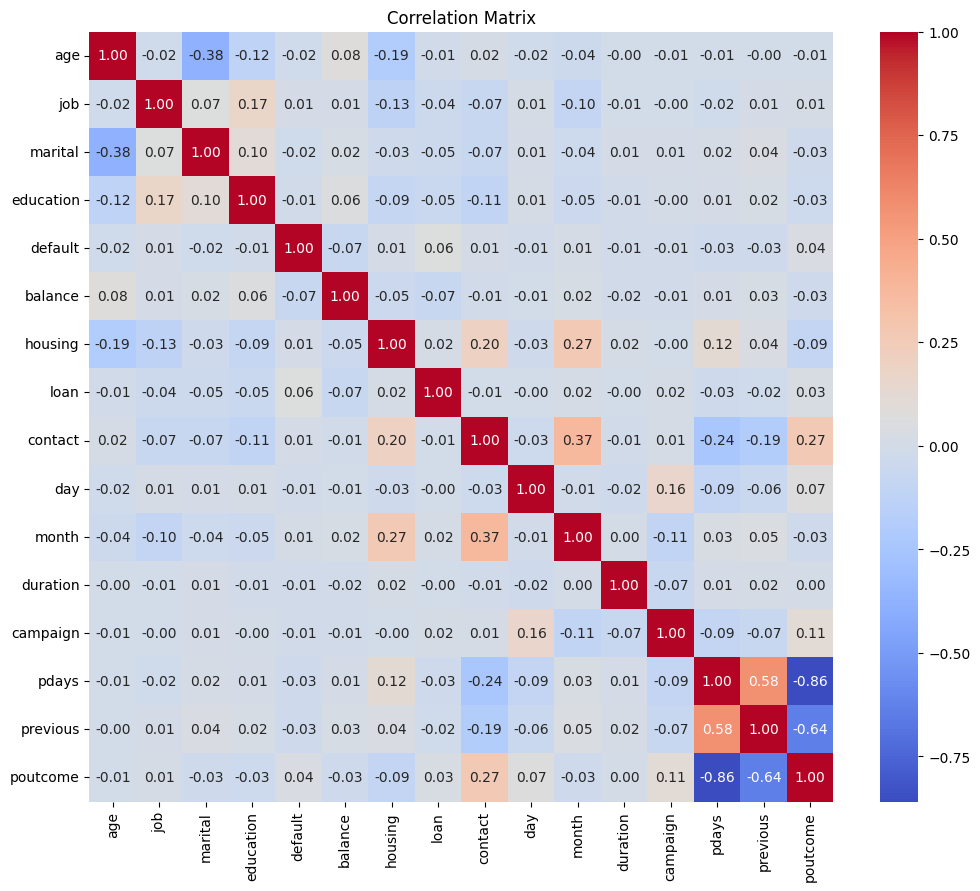

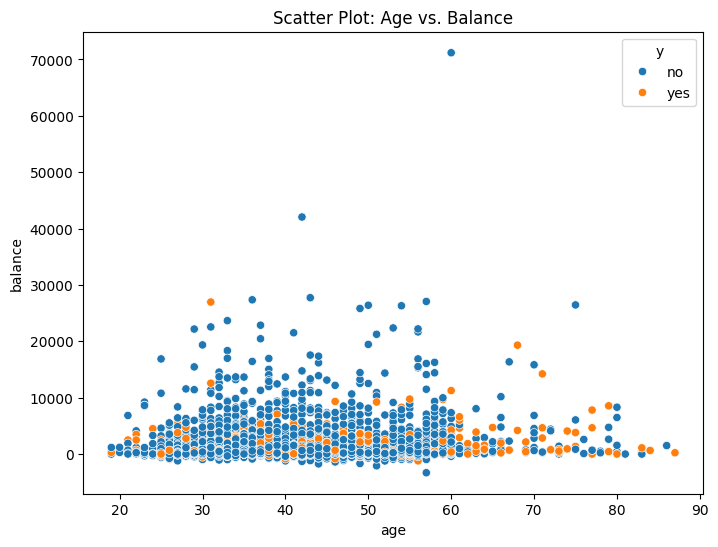

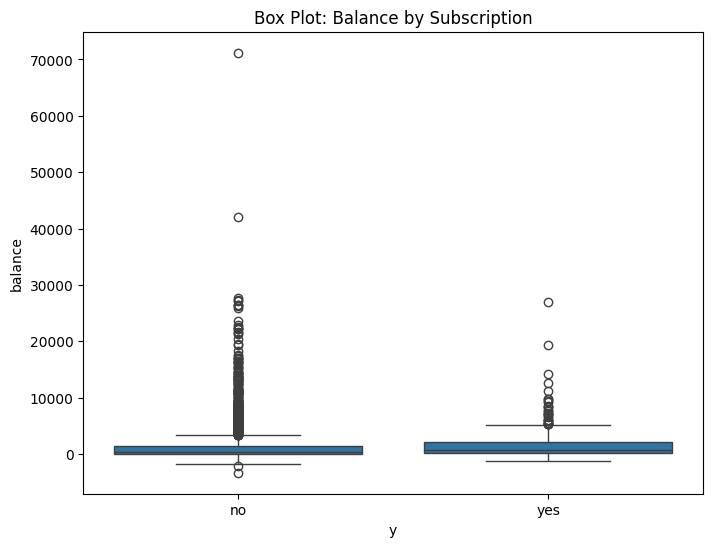

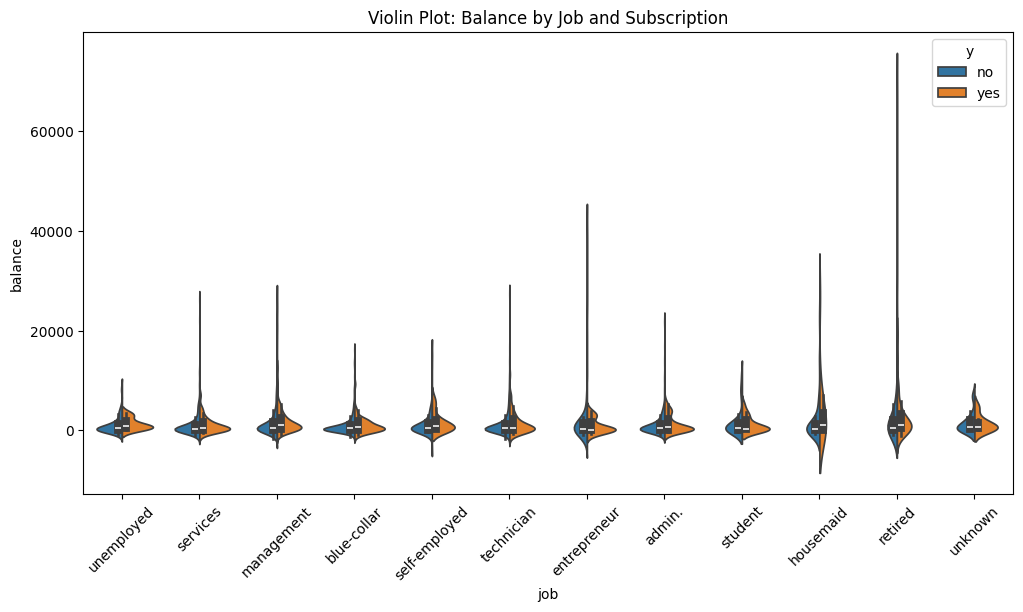

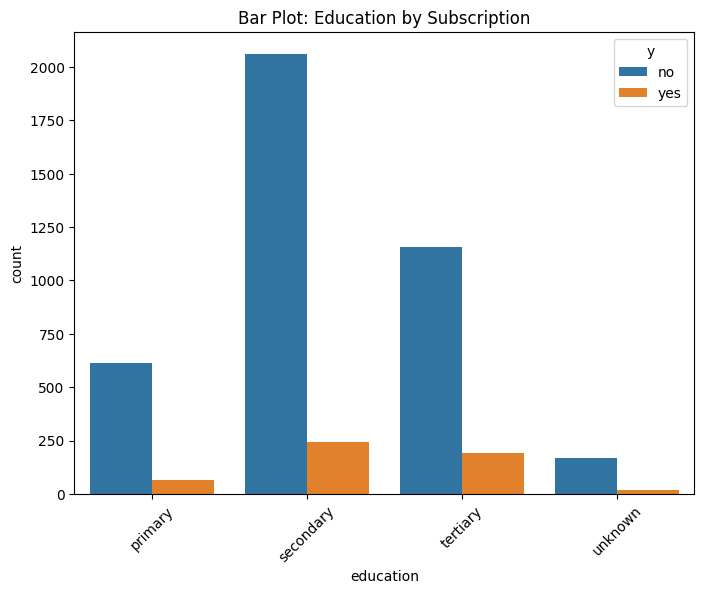

In [5]:
data_display.describe()
for col in categorical_cols:
    print(f'\n------- {col} --------')
    print(data_display[col].value_counts(normalize=True) * 100)
numerical_cols = data.select_dtypes(include=np.number).columns
corr_matrix = data[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='balance', hue='y', data=data_display)
plt.title('Scatter Plot: Age vs. Balance')
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='balance', data=data_display)
plt.title('Box Plot: Balance by Subscription')
plt.show()
plt.figure(figsize=(12, 6))
sns.violinplot(x='job', y='balance', hue='y', data=data_display, split=True)
plt.title('Violin Plot: Balance by Job and Subscription')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(8, 6))
sns.countplot(x='education', hue='y', data=data_display)
plt.title('Bar Plot: Education by Subscription')
plt.xticks(rotation=45)
plt.show()

Split proportions and perform

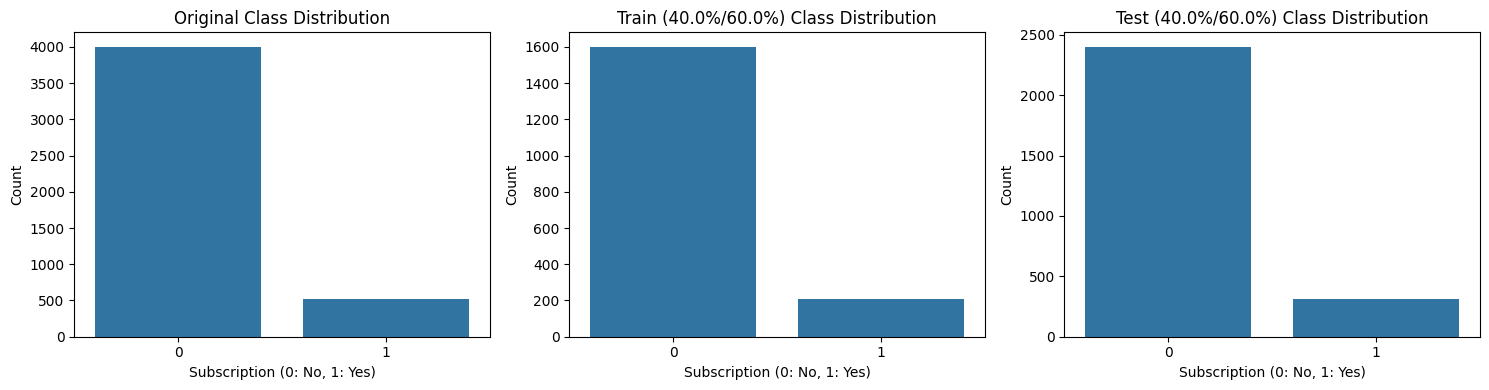


Proportions for 40.0%/60.0% split:
Original class distribution (%): y
0    88.476001
1    11.523999
Name: proportion, dtype: float64
Train class distribution (%): y
0    88.495575
1    11.504425
Name: proportion, dtype: float64
Test class distribution (%): y
0    88.462956
1    11.537044
Name: proportion, dtype: float64


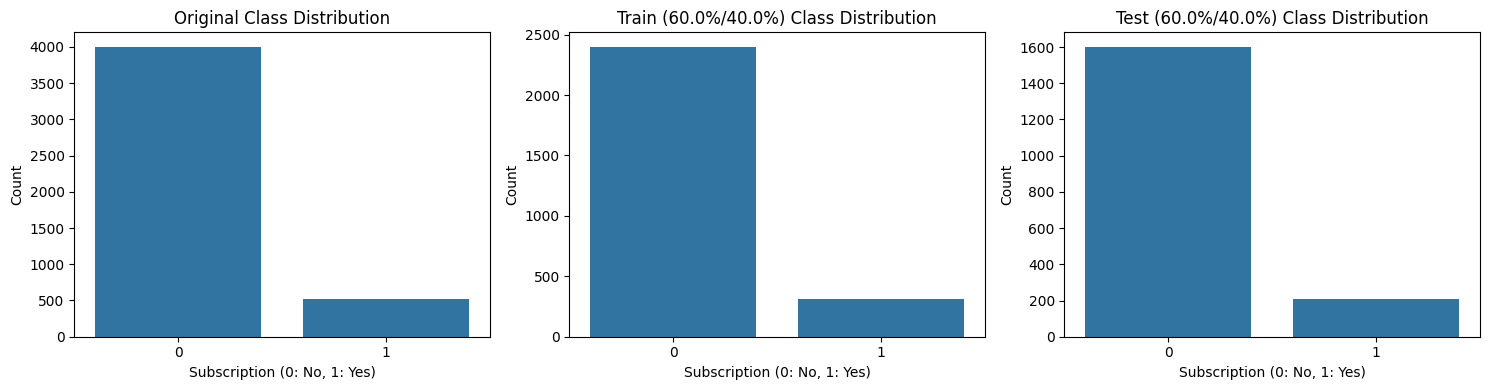


Proportions for 60.0%/40.0% split:
Original class distribution (%): y
0    88.476001
1    11.523999
Name: proportion, dtype: float64
Train class distribution (%): y
0    88.458702
1    11.541298
Name: proportion, dtype: float64
Test class distribution (%): y
0    88.501935
1    11.498065
Name: proportion, dtype: float64


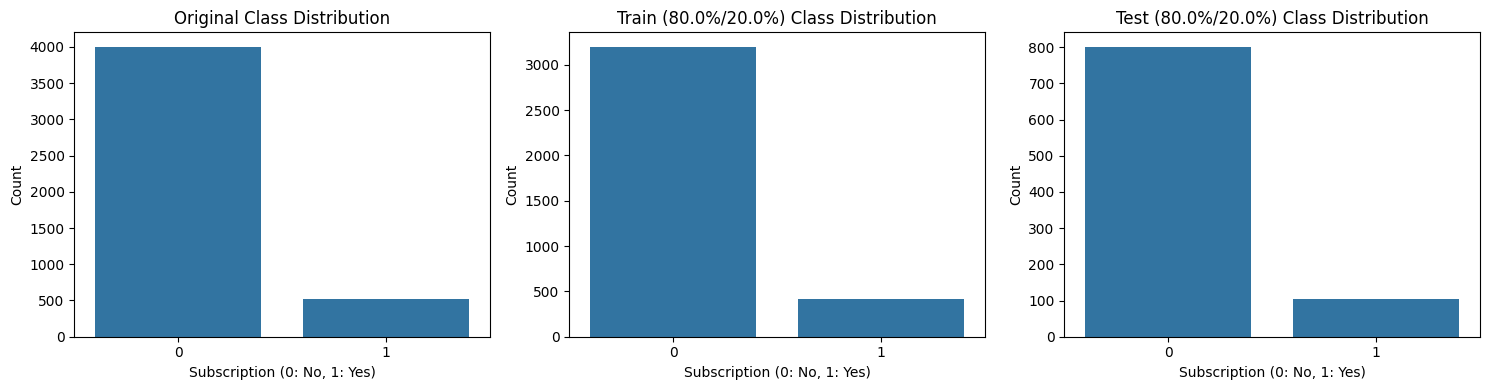


Proportions for 80.0%/20.0% split:
Original class distribution (%): y
0    88.476001
1    11.523999
Name: proportion, dtype: float64
Train class distribution (%): y
0    88.46792
1    11.53208
Name: proportion, dtype: float64
Test class distribution (%): y
0    88.508287
1    11.491713
Name: proportion, dtype: float64


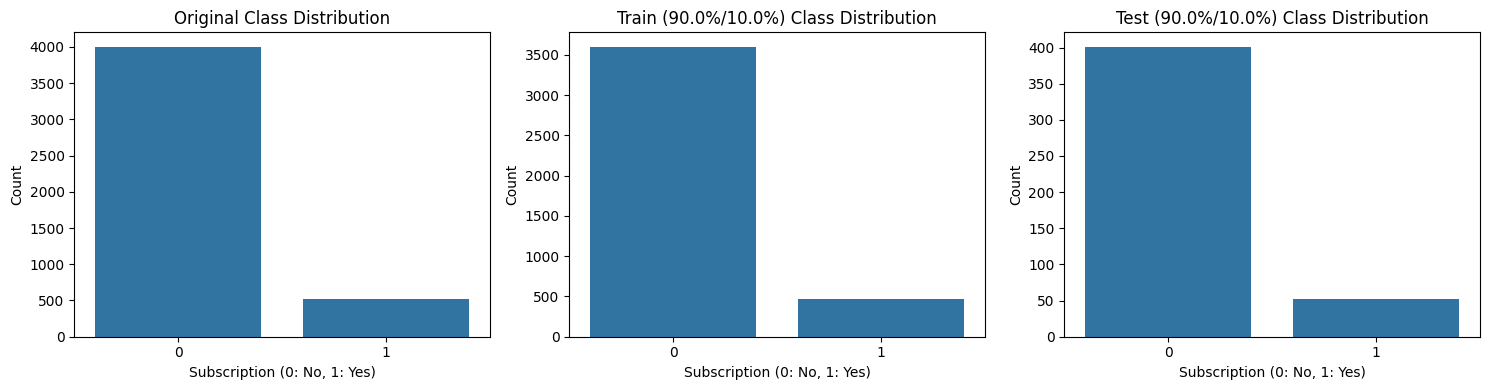


Proportions for 90.0%/10.0% split:
Original class distribution (%): y
0    88.476001
1    11.523999
Name: proportion, dtype: float64
Train class distribution (%): y
0    88.470993
1    11.529007
Name: proportion, dtype: float64
Test class distribution (%): y
0    88.520971
1    11.479029
Name: proportion, dtype: float64


In [ ]:
proportions = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
subsets = {}

for train_size, test_size in proportions:
    X_train, X_test, y_train, y_test = train_test_split(
    X_bank_scaled, y_bank, train_size=train_size, test_size=test_size, 
        stratify=y_bank, shuffle=True, random_state=42
    )
        
    # Lưu trữ 4 tập hợp
    subsets[f'feature_train_{int(train_size*100)}'] = X_train
    subsets[f'label_train_{int(train_size*100)}'] = y_train
    subsets[f'feature_test_{int(test_size*100)}'] = X_test
    subsets[f'label_test_{int(test_size*100)}'] = y_test
        
    # Hiển thị phân phối lớp 
    plt.figure(figsize=(15, 4))
    
    # Original dataset
    plt.subplot(1, 3, 1)
    sns.countplot(x=y_bank, order=[0, 1])
    plt.title('Original Class Distribution')
    plt.xlabel('Subscription (0: No, 1: Yes)')
    plt.ylabel('Count')
        
    # Training set
    plt.subplot(1, 3, 2)
    sns.countplot(x=y_train, order=[0, 1])
    plt.title(f'Train ({train_size*100}%/{test_size*100}%) Class Distribution')
    plt.xlabel('Subscription (0: No, 1: Yes)')
    plt.ylabel('Count')
    
    # Test set
    plt.subplot(1, 3, 3)
    sns.countplot(x=y_test, order=[0, 1])
    plt.title(f'Test ({train_size*100}%/{test_size*100}%) Class Distribution')
    plt.xlabel('Subscription (0: No, 1: Yes)')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()
        
    # In thông tin phân phối lớp
    print(f"\nProportions for {train_size*100}%/{test_size*100}% split:")
    print("Original class distribution (%):", y_bank.value_counts(normalize=True) * 100)
    print("Train class distribution (%):", y_train.value_counts(normalize=True) * 100)
    print("Test class distribution (%):", y_test.value_counts(normalize=True) * 100)